In [ ]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# So our plots appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, RocCurveDisplay, roc_curve

In [ ]:
## Upload the datset
from google.colab import files
upload = files.upload()

Saving Telco_Customer_Churn.csv to Telco_Customer_Churn.csv


In [ ]:
## Found from IBM Public Datasets
df1 = pd.read_csv('Telco_Customer_Churn.csv')

In [ ]:
## Drop customerID
df = df1.drop('customerID', axis = 1)

In [ ]:
## See first five lines of dataset
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info() ## used to figure which variables are categorical or continuous
df.describe() ## for each numerical variable, it gives a quick summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
## check for null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis

## 1. Target Variable

In [ ]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

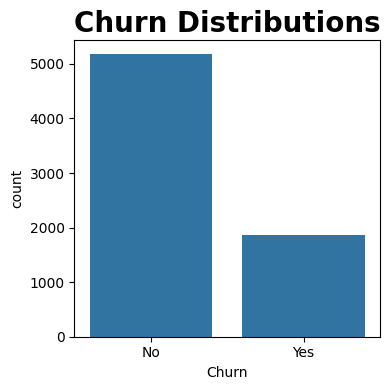

In [ ]:
fig = plt.figure(figsize=(4, 4))
t = sns.countplot(data=df, x='Churn')
plt.title('Churn Distributions', fontsize=20, fontweight='bold')
plt.tight_layout()

## 2. Gender

Text(0, 0.5, 'Count')

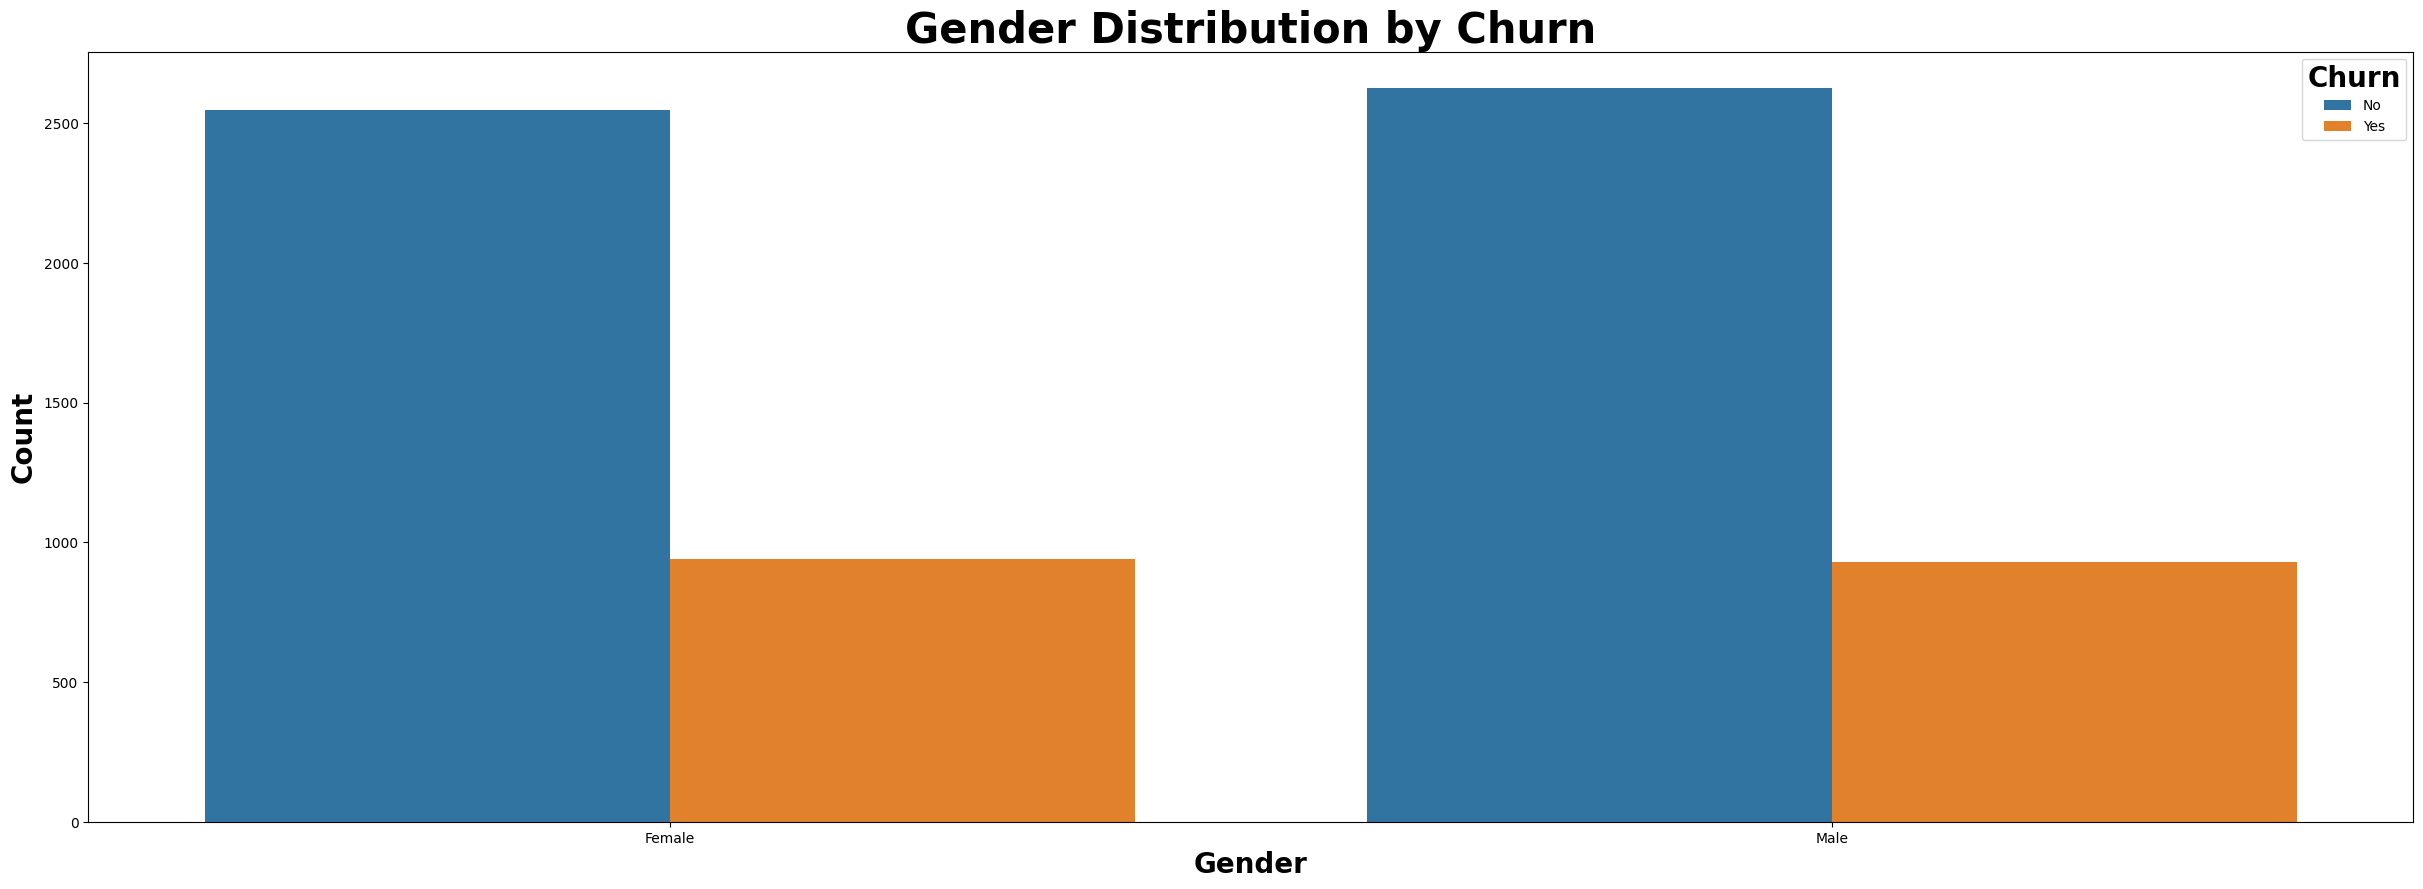

In [ ]:
fig = plt.figure(figsize=(30, 10))

a = sns.countplot(data=df, x='gender', hue='Churn')
legend = a.legend(title='Churn', labels=['No', 'Yes'])
legend.set_title('Churn', prop={'size': 20, 'weight': 'bold'})  # Set legend title properties
a.set_title('Gender Distribution by Churn', fontsize=30, fontweight='bold')
a.set_xlabel('Gender', fontweight='bold', fontsize=20)
a.set_ylabel('Count', fontweight='bold', fontsize=20)

Gender does not appear to be a indicator of churn.

## 3. Features with Yes/No

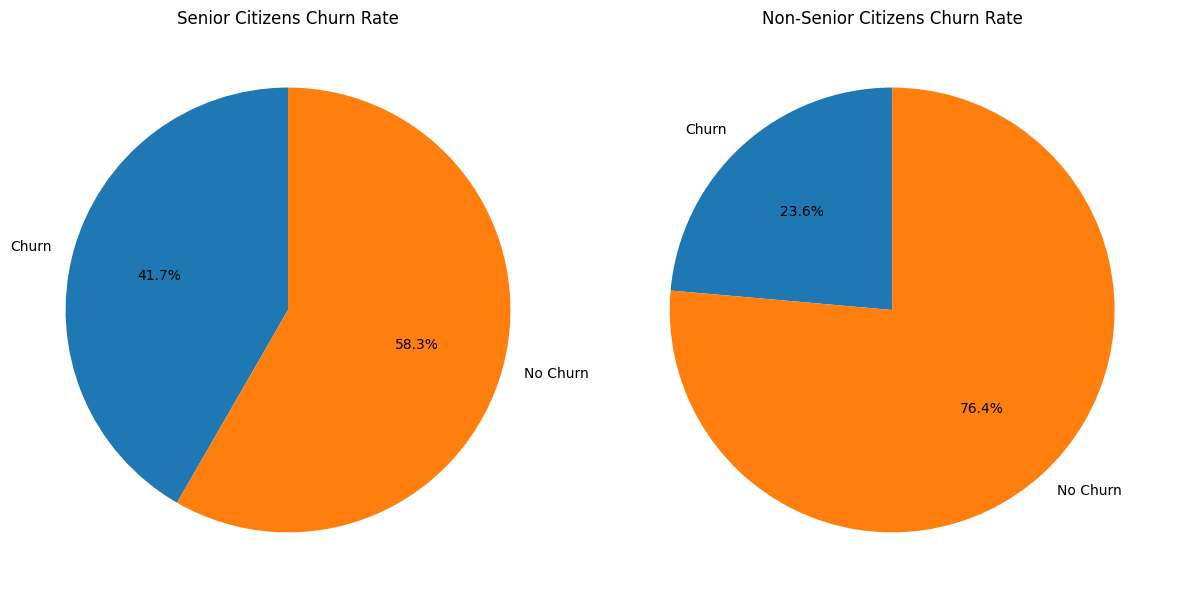

In [ ]:
temp_df = df.copy()
temp_df['SeniorCitizen'] = temp_df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

# Calculate churn rate for senior citizens
senior_churn_rate = temp_df[temp_df['SeniorCitizen'] == 'Yes']['Churn'].value_counts(normalize=True)
# Calculate churn rate for non-senior citizens
non_senior_churn_rate = temp_df[temp_df['SeniorCitizen'] == 'No']['Churn'].value_counts(normalize=True)

# Plotting
labels = ['Churn', 'No Churn']
senior_sizes = [senior_churn_rate['Yes'], senior_churn_rate['No']]
non_senior_sizes = [non_senior_churn_rate['Yes'], non_senior_churn_rate['No']]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(senior_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Senior Citizens Churn Rate')

ax[1].pie(non_senior_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Non-Senior Citizens Churn Rate')

plt.tight_layout()
plt.show()


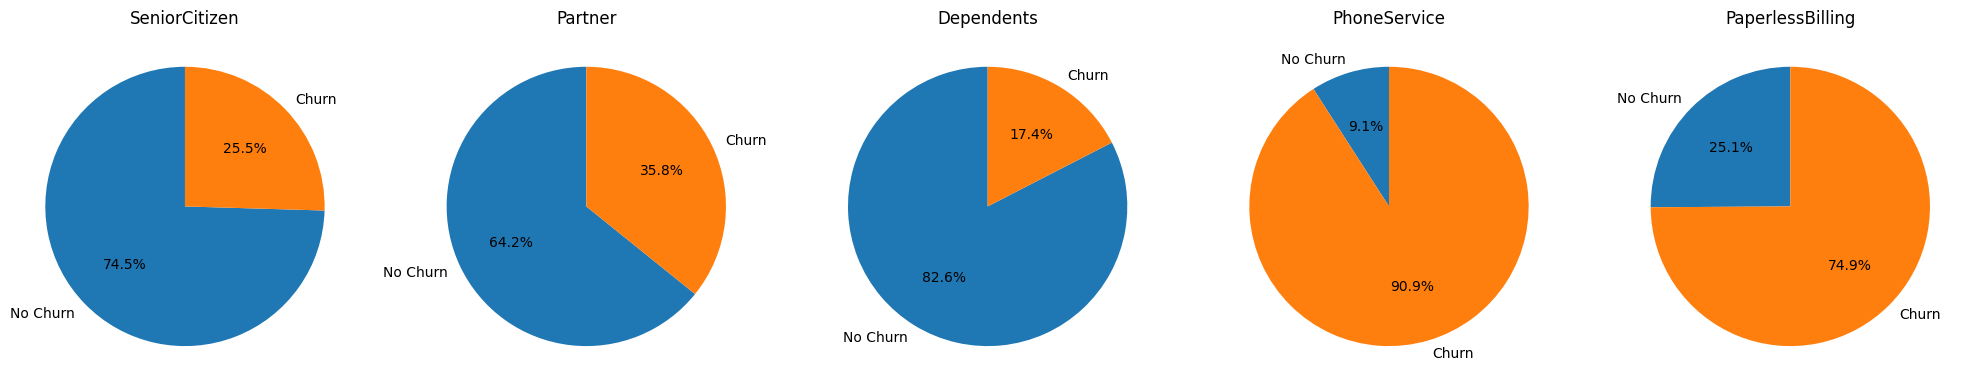

In [ ]:
temp_df = df.copy()
temp_df['SeniorCitizen'] = temp_df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, feature in enumerate(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']):
    counts = temp_df.groupby([feature, 'Churn']).size().unstack()
    axes[i].pie(counts['Yes'], labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

Senior Citizen:
* Non-senior citizens churn > senior citizens
* A higher proportion of senior citizens churn >  non-senior citizens

Partner + Dependent:
* Those w/o partners are more likely to churn than those w/ partners
* Customers w/o dependents are more likely to churn than those w/ dependents

Phone Service Conclusions:
* More customers with only phone service will not churn than those other customers

Payments Conclusions:
- Customers with non-paperless billing churn more than paperless customers


## 4. PaymentMethods + PaperlessBilling

In [ ]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

<ipython-input-14-6a0b1910808e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(a.get_xticklabels(), rotation = 45)


[Text(0, 0, 'Bank transfer (automatic)'),
 Text(1, 0, 'Credit card (automatic)'),
 Text(2, 0, 'Electronic check'),
 Text(3, 0, 'Mailed check')]

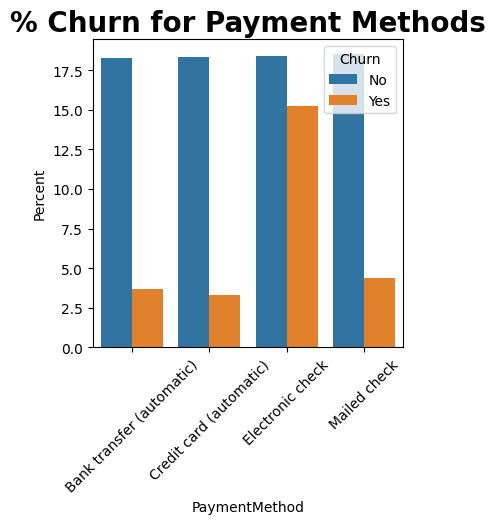

In [ ]:
fig = plt.figure(figsize=(4, 4))
copy = df.copy()
copy = copy.groupby('PaymentMethod')['Churn'].value_counts().to_frame().reset_index()
copy['Percent'] = ((copy['count']/len(df))*100).round(2)
a = sns.barplot(x='PaymentMethod', y='Percent', hue='Churn', data = copy)
a.set_title('% Churn for Payment Methods', fontsize = 20, fontweight = 'bold')
a.set_xticklabels(a.get_xticklabels(), rotation = 45)

**Payments Conclusions:**
- Customers with non-paperless billing churn almost 15% > paperless customers
- Customers who pay with e-check churn 10% > customers with all other payment methods

## 5. Add On Services

includes InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies  

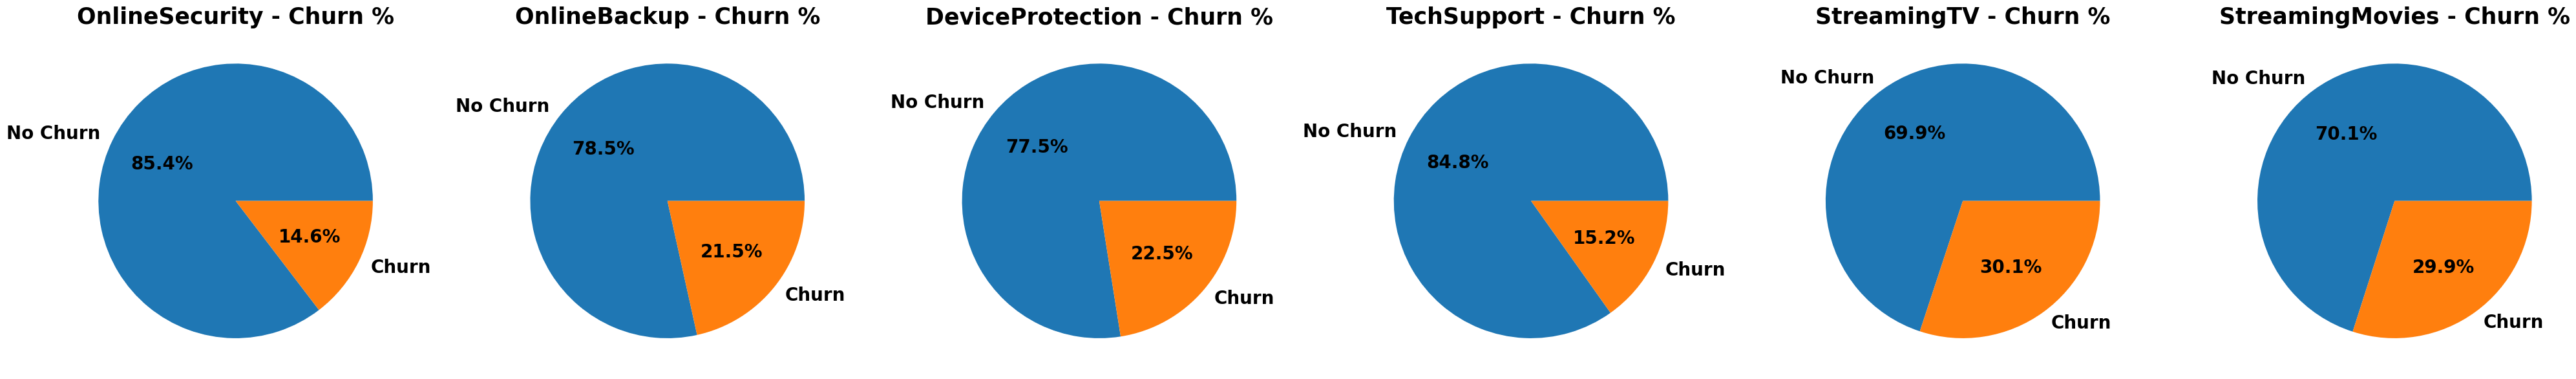

In [ ]:
features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(1, 6, figsize=(40, 15))

for i, feature in enumerate(features):
    copy = df[df.InternetService != 'No']
    copy_feature = copy[copy[feature] == 'Yes']
    ax = axes[i]
    ax.pie(copy_feature.Churn.value_counts(), labels=['No Churn', 'Churn'], autopct='%.1f%%', textprops={'fontsize': 20, 'fontweight': 'bold'})
    ax.set_title(f'{feature} - Churn %', fontsize=25, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Tenure and MonthlyCharges

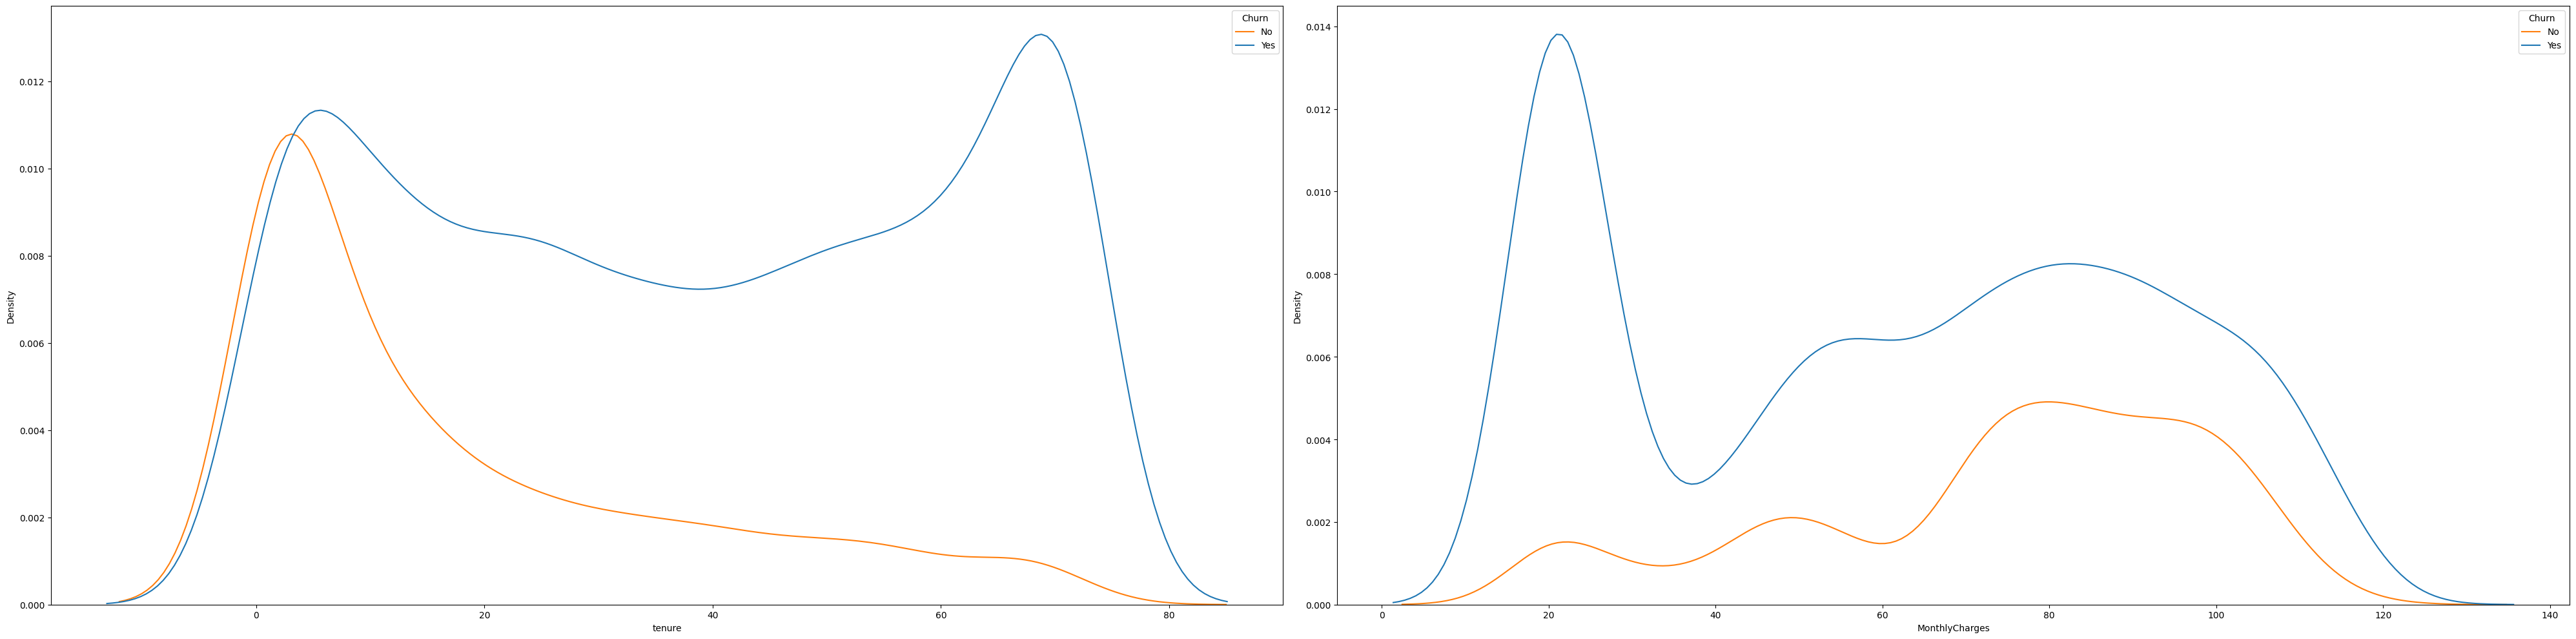

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(40, 10))

for i, col in enumerate(['tenure', 'MonthlyCharges']):
    sns.kdeplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


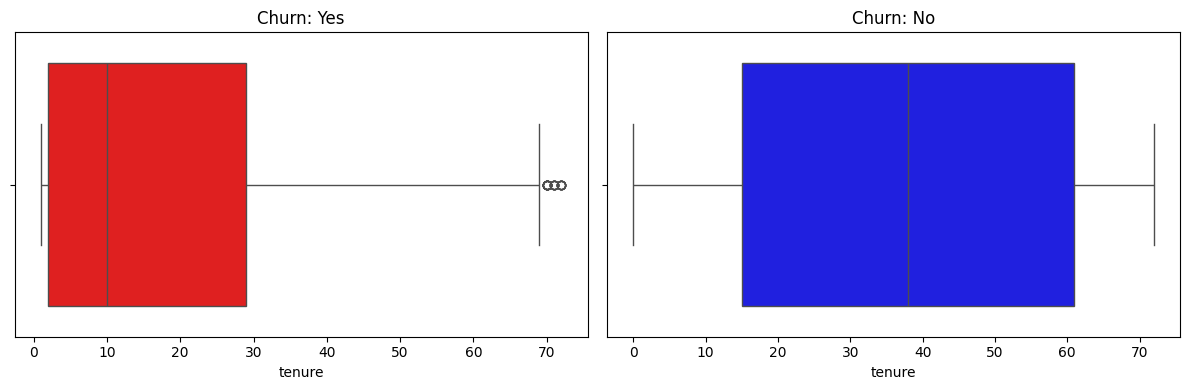

In [ ]:
temp_df2 = df.copy()
temp_df2['Churn'] = df['Churn'].replace({0: 'No', 1: 'Yes'})

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plotting histogram with churn
sns.boxplot(data=temp_df2[temp_df2["Churn"] == "Yes"], x="tenure", ax=ax[0], color="red")
ax[0].set_title("Churn: Yes")

# Plotting histogram without churn
sns.boxplot(data=temp_df2[temp_df2["Churn"] == "No"], x="tenure", ax=ax[1], color="blue")
ax[1].set_title("Churn: No")

plt.tight_layout()
plt.show()


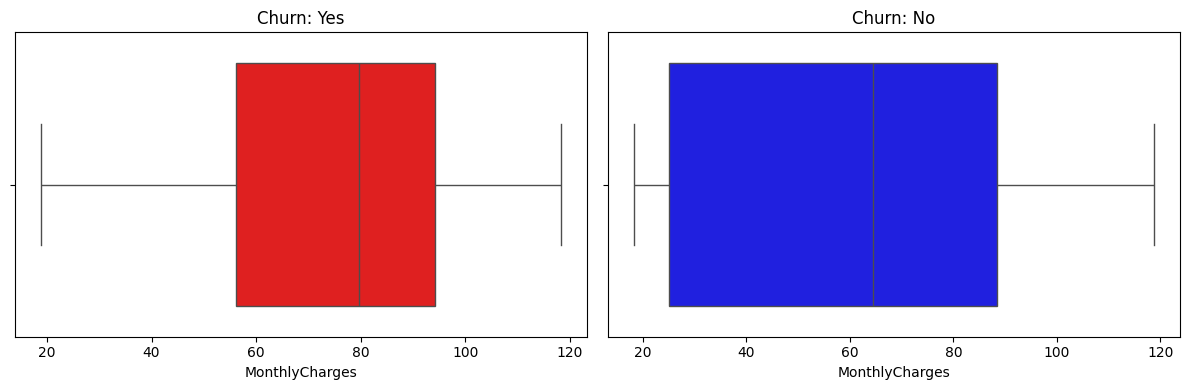

In [ ]:
temp_df2 = df.copy()
temp_df2['Churn'] = df['Churn'].replace({0: 'No', 1: 'Yes'})

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plotting histogram with churn
sns.boxplot(data=temp_df2[temp_df2["Churn"] == "Yes"], x="MonthlyCharges", ax=ax[0], color="red")
ax[0].set_title("Churn: Yes")

# Plotting histogram without churn
sns.boxplot(data=temp_df2[temp_df2["Churn"] == "No"], x="MonthlyCharges", ax=ax[1], color="blue")
ax[1].set_title("Churn: No")

plt.tight_layout()
plt.show()


# Model Fitting

In [ ]:
## convert all yes and no to 0's & 1's so our classifier can use this data.
columns_to_convert = ['Partner',
                      'Dependents',
                      'PhoneService',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling',
                      'Churn']

for item in columns_to_convert:
    df[item].replace(to_replace='Yes', value=1, inplace=True)
    df[item].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
## Seperate continuous and categorical variables
## See the feature names
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print ("Continuous var: ", numeric_df.columns)
print("Dimensions of numeric_df:", numeric_df.shape)

categorical_df = df.select_dtypes(include=['object'])
print ("\nCategorical var: ", categorical_df.columns)
print("Dimensions of categorical_df:", categorical_df.shape)

Continuous var:  Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')
Dimensions of numeric_df: (7043, 8)

Categorical var:  Index(['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'TotalCharges'],
      dtype='object')
Dimensions of categorical_df: (7043, 12)


In [ ]:
X = numeric_df.drop('Churn', axis = 1)
y = numeric_df['Churn']

In [ ]:
## split X, y into training and testing sets with training proportion as 0.8
## set random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, shuffle=True, random_state=0)

In [ ]:
## logistic regression
## this is training a logistic regression model on some training data,
## making predictions on test data, and then printing the accuracy
## of the model on the test set.

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_ypred = lr.predict(X_test)
print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))

Test set score: 0.782


In [ ]:
## decision tree model

tree_model = DecisionTreeClassifier(criterion='gini')
tree_model.fit(X_train,y_train )
tree_ypred = tree_model.predict(X_test)
print("Test set score: {:.3f}".format(tree_model.score(X_test, y_test)))

Test set score: 0.719


In [ ]:
## random forest model

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_ypred = rf.predict(X_test)
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))

Test set score: 0.769


# Model Evaluation

In [ ]:
## classification Report

## using Confusion Matrix as a helper function
def plot_confusionmatrix(y_train_pred,y_train, dom, classes):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train,y_train_pred)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1041
         Yes       0.61      0.47      0.53       368

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

Accuracy Sore: 0.782
Test Confusion matrix


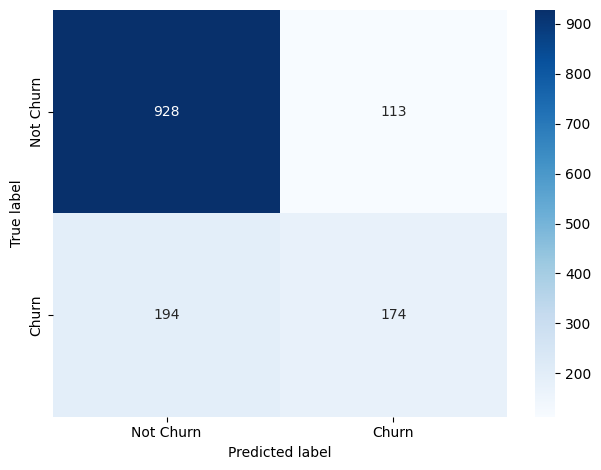

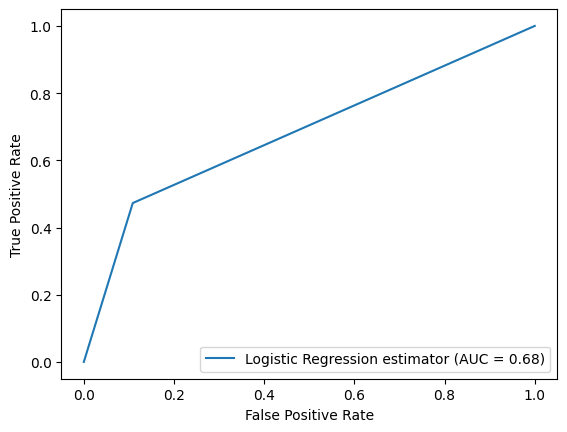

In [34]:
classes =['Not Churn', 'Churn']

## classification_report for the logistic regression
## predictions with the ground truth label for the testing dataset
print(classification_report(y_test, lr_ypred, target_names=['No', 'Yes']))
print("Accuracy Sore: {:.3f}".format(accuracy_score(y_test, lr_ypred)))

plot_confusionmatrix(lr_ypred,y_test,dom='Test', classes=classes)

fpr, tpr, thresholds = roc_curve(y_test, lr_ypred)

from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                        estimator_name='Logistic Regression estimator')
display.plot()
plt.show()

              precision    recall  f1-score   support

          No       0.81      0.81      0.81      1041
         Yes       0.46      0.46      0.46       368

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409

Accuracy Sore: 0.719
Test Confusion matrix


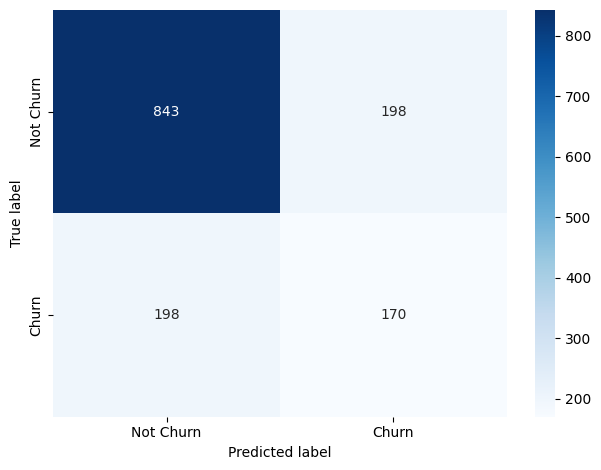

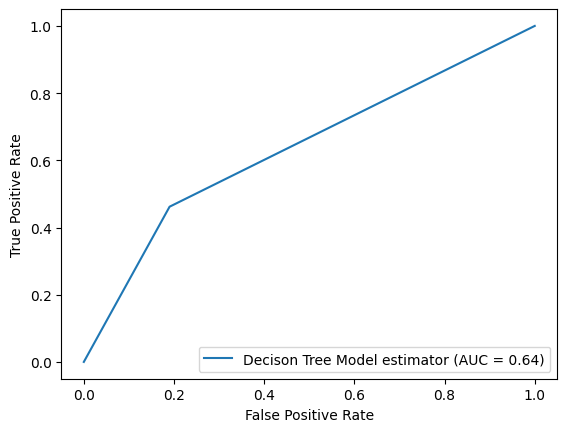

In [35]:
## Decision Tree Model for classification
## using classification_report()
## using plot_confusionmatrix
## plot the ROC curve

print(classification_report(y_test, tree_ypred, target_names=['No', 'Yes']))
print("Accuracy Sore: {:.3f}".format(accuracy_score(y_test, tree_ypred)))

plot_confusionmatrix(tree_ypred,y_test,dom='Test', classes=classes)

fpr, tpr, thresholds = roc_curve(y_test, tree_ypred)
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                        estimator_name='Decison Tree Model estimator')
display.plot()
plt.show()

              precision    recall  f1-score   support

          No       0.82      0.88      0.85      1041
         Yes       0.57      0.46      0.51       368

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409

Accuracy Sore: 0.769
Test Confusion matrix


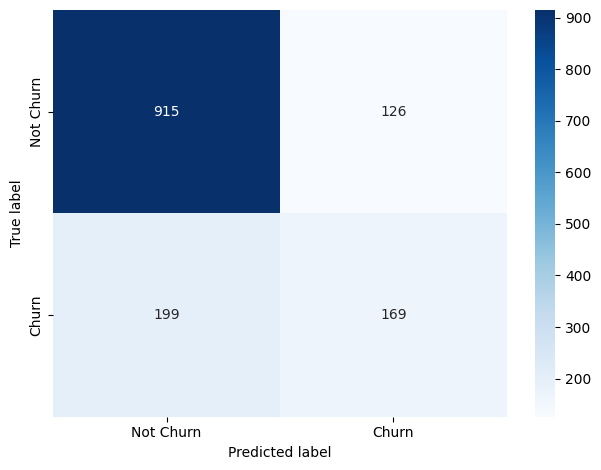

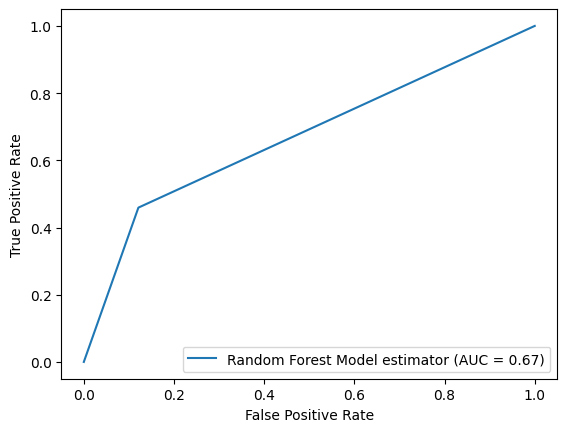

In [36]:
## Random Forest Model for classification
## using classification_report()
## using plot_confusionmatrix
## Using plot_roc_curve

print(classification_report(y_test, rf_ypred, target_names=['No', 'Yes']))
print("Accuracy Sore: {:.3f}".format(accuracy_score(y_test, rf_ypred)))

plot_confusionmatrix(rf_ypred,y_test,dom='Test', classes=classes)

fpr, tpr, thresholds = roc_curve(y_test, rf_ypred)
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                        estimator_name='Random Forest Model estimator')
display.plot()
plt.show()

<ipython-input-37-7a904365f08d>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


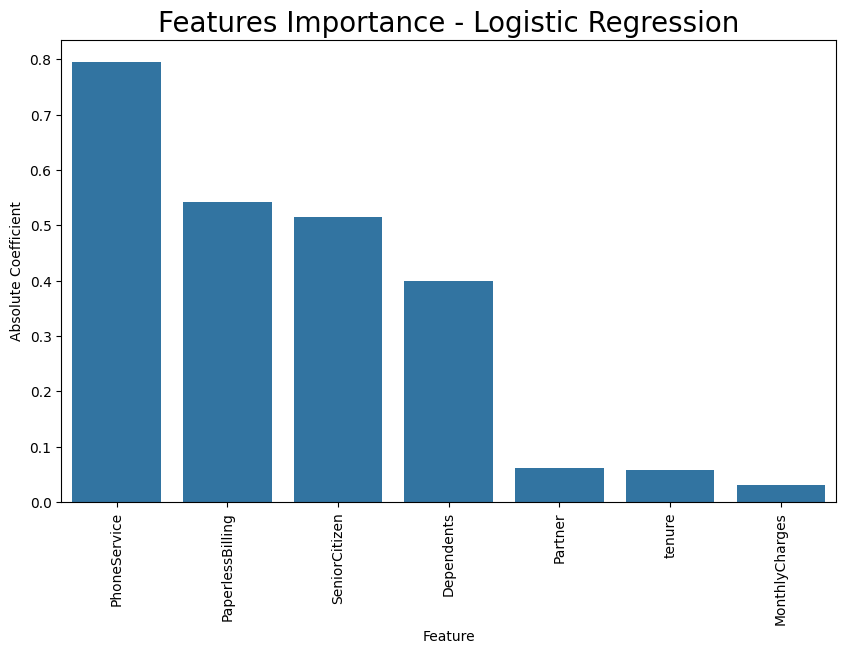

In [37]:
## feature importance
features = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges']
coefficients = lr.coef_
coefficients_flat = coefficients.flatten()

# Create a DataFrame to store feature names and their corresponding coefficients
feat_import = pd.DataFrame({'Feature': features, 'Coefficient': coefficients_flat})

# Sort the DataFrame by absolute coefficient values to see the most important features
feat_import['Absolute Coefficient'] = feat_import['Coefficient'].abs()
feat_import = feat_import.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
g = sns.barplot(x='Feature', y='Absolute Coefficient', data=feat_import)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Features Importance - Logistic Regression', fontsize=20)
plt.show()


The number of classes before fit: Counter({0: 4133, 1: 1501})
The number of classes after fit: Counter({0: 3896, 1: 2862})
Test set score: 0.769
Accuracy Sore: 0.740
              precision    recall  f1-score   support

          No       0.87      0.77      0.81      1041
         Yes       0.50      0.66      0.57       368

    accuracy                           0.74      1409
   macro avg       0.68      0.71      0.69      1409
weighted avg       0.77      0.74      0.75      1409

Test Confusion matrix


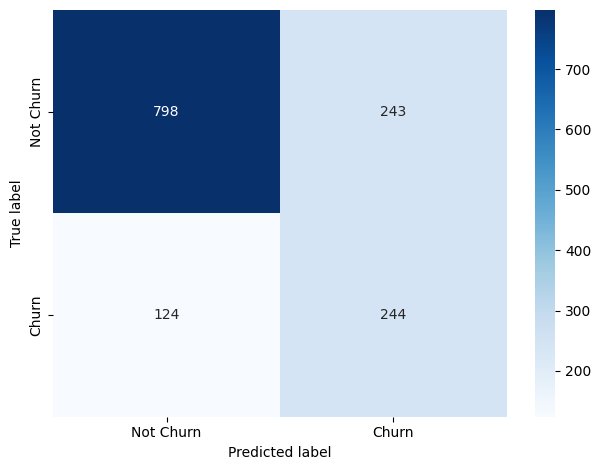

In [38]:
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Apply SMOTETomek to address class imbalance
os = SMOTETomek(sampling_strategy=0.75)
X_train_ns, y_train_ns = os.fit_resample(X_train, y_train)

# Print class distribution before and after SMOTETomek
print("The number of classes before fit: {}".format(Counter(y_train)))
print("The number of classes after fit: {}".format(Counter(y_train_ns)))

classifier = LogisticRegression()
classifier.fit(X_train_ns, y_train_ns)

# Make predictions on test data
lrs_ypred = classifier.predict(X_test)
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))
print("Accuracy Sore: {:.3f}".format(accuracy_score(y_test, lrs_ypred)))

# Print classification report
print(classification_report(y_test, lrs_ypred,target_names=['No', 'Yes']))

# Plot confusion matrix
plot_confusionmatrix(lrs_ypred, y_test, dom='Test', classes=classes)